# Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Memisahkan data train, val dan test ke dalam masing-masing folder

In [ ]:
import os
import shutil
import random

# Parameters
input_dir = 'Original'  # Input directory with original dataset
output_dir = '/content/drive/MyDrive/SKRIPSI/dataset/original'  # Output directory for the new structure
os.makedirs(output_dir, exist_ok=True)
split_ratios = (0.8, 0.1, 0.1)  # Ratios for train, val, and test splits

# Ensure output directories exist
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

# Get all class folders
classes = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]

for class_name in classes:
    class_path = os.path.join(input_dir, class_name)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Shuffle images
    random.shuffle(images)

    # Compute split sizes
    total_images = len(images)
    print(total_images)
    train_end = int(split_ratios[0] * total_images)
    val_end = train_end + int(split_ratios[1] * total_images)

    # Split images
    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Create class directories in output directories
    os.makedirs(os.path.join(output_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', class_name), exist_ok=True)

    # Move images to respective directories
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'train', class_name, img))
    for img in val_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'val', class_name, img))
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'test', class_name, img))

print("Dataset split completed.")


# CLAHE preprocessing

In [22]:
import cv2
from google.colab.patches import cv2_imshow

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

dataset_path = '/content/drive/MyDrive/SKRIPSI/dataset'

os.makedirs(os.path.join(dataset_path, 'clahe'), exist_ok=True)

for set_data in os.listdir(os.path.join(dataset_path, 'original')): # Train, val, test

    os.makedirs(os.path.join(dataset_path, 'clahe', set_data), exist_ok=True)
    for clas in os.listdir(os.path.join(dataset_path, 'original', set_data)): # early, benign, pre, pro

        os.makedirs(os.path.join(dataset_path, 'clahe', set_data, clas), exist_ok=True)
        for img in os.listdir(os.path.join(dataset_path, 'original', set_data, clas)): # file name

            img_path = os.path.join(dataset_path, 'original', set_data, clas, img)

            image = cv2.imread(img_path)
            lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)

            l = clahe.apply(l)

            lab = cv2.merge([l, a, b])

            image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
            cv2.imwrite(
                filename=os.path.join(
                    dataset_path, 'clahe', set_data, clas, img
                ),
                img=image
            )

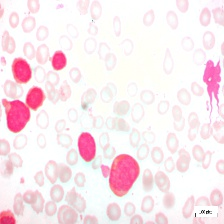

In [9]:
from matplotlib import pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)